In [1]:
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import re
import sklearn

import os
import json

In [139]:
def getShotChartDetailGithub(startYear, endYear):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    df_list_player=[]
    df_list_avg=[]
    for i in range(startYear, endYear+1):
        s=str(i-1)+'-'+str(i)[-2:] 
        url="https://raw.githubusercontent.com/MAP536/PythonProject/master/json/kobe{}.json".format(i)
        response=requests.get(url, headers=headers)
        data=json.loads(response.text)
        tmpplayer=pd.DataFrame(data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
        tmpavg=pd.DataFrame(data['resultSets'][1]['rowSet'], columns=data['resultSets'][1]['headers'])
        tmpplayer["SEASON"], tmpavg["SEASON"] = [i,i]
        df_list_player.append(tmpplayer)
        df_list_avg.append(tmpavg)
    return([pd.concat(df_list_player),pd.concat(df_list_avg)])
kobetest,avgtest=getShotChartDetailGithub(1997,2016)

In [141]:
kobetest.shape

(26198, 25)

### LOADING DATA

In [125]:
def getShotChartDetail(p, startYear, endYear):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    df_list_player=[]
    df_list_avg=[]
    for i in range(startYear, endYear+1):
        s=str(i-1)+'-'+str(i)[-2:]
        url="https://stats.nba.com/stats/shotchartdetail?ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&Period=0&PlayerID={0}&PlayerPosition=&Position=&Season={1}&SeasonSegment=&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision=&RookieYear=".format(p, s)
        response=requests.get(url, headers=headers)
        data=json.loads(response.text)
        tmpplayer=pd.DataFrame(data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
        tmpavg=pd.DataFrame(data['resultSets'][1]['rowSet'], columns=data['resultSets'][1]['headers'])
        tmpplayer["SEASON"], tmpavg["SEASON"] = [i,i]
        df_list_player.append(tmpplayer)
        df_list_avg.append(tmpavg)
    return([pd.concat(df_list_player),pd.concat(df_list_avg)])

In [ ]:
#json_list=list(map(lambda x: "json/"+x, os.listdir('json')))
#df_list_player=[]
#df_list_avg=[]
#for idx, i in enumerate(json_list):
#    with open(i) as j:
#        data=json.load(j)
#        tmpplayer=pd.DataFrame(data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
#        tmpavg=pd.DataFrame(data['resultSets'][1]['rowSet'], columns=data['resultSets'][1]['headers'])
#        tmpplayer["SEASON"], tmpavg["SEASON"] = [int(i[9:13]),int(i[9:13])]
#        df_list_player.append(tmpkobe)
#        df_list_avg.append(tmpavg)
#
#kobe = pd.concat(df_list_player)
#avg = pd.concat(df_list_avg)

In [3]:
kobe, avg=getShotChartDetail(977,1997,2016)
kobe.shape

(26198, 25)

In [4]:
pd.set_option('display.max_columns', None)
kobe

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON
0,Shot Chart Detail,0029600027,102,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,42,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-140,116,1,0,19961103,LAL,MIN,1997
1,Shot Chart Detail,0029600031,127,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,10,8,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-131,97,1,0,19961105,NYK,LAL,1997
2,Shot Chart Detail,0029600044,124,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,8,37,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,-142,181,1,1,19961106,CHH,LAL,1997
3,Shot Chart Detail,0029600044,144,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,6,34,Missed Shot,Jump Shot,3PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,0,19961106,CHH,LAL,1997
4,Shot Chart Detail,0029600044,151,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,5,27,Made Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,13,-10,138,1,1,19961106,CHH,LAL,1997
5,Shot Chart Detail,0029600057,157,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,7,18,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,19,75,177,1,0,19961108,TOR,LAL,1997
6,Shot Chart Detail,0029600057,226,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,2,16,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Center(C),16-24 ft.,23,-64,223,1,1,19961108,TOR,LAL,1997
7,Shot Chart Detail,0029600057,321,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,3,25,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,19961108,TOR,LAL,1997
8,Shot Chart Detail,0029600057,334,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,53,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,19,-79,177,1,0,19961108,TOR,LAL,1997
9,Shot Chart Detail,0029600057,337,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,14,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,-103,207,1,1,19961108,TOR,LAL,1997


### Cleaning up data

In [23]:
df=kobe.copy()
intcol,objcol=[],[]
for i in df.columns:
    print(i, ": ", df[i].dtype.name)
    intcol.append(i) if df[i].dtype.name=='int64' else objcol.append(i)

GRID_TYPE :  object
GAME_ID :  object
GAME_EVENT_ID :  int64
PLAYER_ID :  int64
PLAYER_NAME :  object
TEAM_ID :  int64
TEAM_NAME :  object
PERIOD :  int64
MINUTES_REMAINING :  int64
SECONDS_REMAINING :  int64
EVENT_TYPE :  object
ACTION_TYPE :  object
SHOT_TYPE :  object
SHOT_ZONE_BASIC :  object
SHOT_ZONE_AREA :  object
SHOT_ZONE_RANGE :  object
SHOT_DISTANCE :  int64
LOC_X :  int64
LOC_Y :  int64
SHOT_ATTEMPTED_FLAG :  int64
SHOT_MADE_FLAG :  int64
GAME_DATE :  object
HTM :  object
VTM :  object
SEASON :  int64


##### Categorical

In [24]:
for i in objcol:
    print("{0}: \n{1}\n".format(i,df[i].value_counts()))

GRID_TYPE: 
Shot Chart Detail    26198
Name: GRID_TYPE, dtype: int64

GAME_ID: 
0021501228    50
0020200069    47
0020500591    46
0020600431    45
0020601081    44
0020700553    44
0020200743    41
0021200398    41
0020500480    41
0020200127    40
0020500988    39
0020600977    39
0020800884    38
0020501078    38
0020600340    38
0020200769    38
0020601016    37
0020701082    37
0020200142    37
0020500412    37
0021400056    37
0020900527    37
0020500192    36
0020500114    36
0020600994    35
0020500563    35
0020200372    35
0020000267    35
0020200223    35
0020500130    35
              ..
0020001059     4
0029601162     4
0029600698     4
0029600112     4
0021200971     4
0029600362     3
0029600432     3
0029600044     3
0029600488     3
0029600072     3
0029600991     3
0029600727     3
0021500906     2
0029600095     2
0029600382     2
0029600219     2
0029600844     2
0020400518     2
0029600781     2
0029600086     2
0029600136     2
0029600961     1
0029700933     1
00

In [25]:
#add opponents
df['OPP']=np.where(df.HTM=='LAL', df.VTM, df.HTM)

#aggregate shot types
shot_labels={"Dunk":"Dunk Shot","Layup|Finger":"Layup Shot","Hook":"Hook Shot","Jump|Bank|Fadeaway":"Jump Shot","Tip":"Tip Shot"}
df["ACTION_TYPE2"]=df.ACTION_TYPE
for k, v in shot_labels.items():
    df.loc[df.ACTION_TYPE.str.contains(k),"ACTION_TYPE"] = v
    
#format date
df['GAME_DATE']=df.GAME_DATE.apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))

#check if event_flag same as shot_made_flag
df.SHOT_MADE_FLAG.eq(df.EVENT_TYPE.replace("Missed Shot",0).replace("Made Shot",1)).value_counts()

#transform details of actiontype into indicator variables
df['ACTION_TYPE2']=list(map(lambda x: re.sub('Jump|Layup|Dunk|Hook|Tip|Shot|-','',x, flags=re.IGNORECASE).strip(),df.ACTION_TYPE2))
for i in ['Finger Roll','Step Back','Alley Oop']:
    df['ACTION_TYPE2']=list(map(lambda x: re.sub(i,i.replace(' ',''),x),df['ACTION_TYPE2']))
    
 #remove empty
action_detail=list(set(filter(None, df.ACTION_TYPE2)))
action_detail=list(set(' '.join(action_detail).upper().split(' ')))

df['ACTION_TYPE2']=df.ACTION_TYPE2.str.upper()
for i in action_detail:
    df[i]=np.where(df.ACTION_TYPE2.str.contains(i),1,0)
df=df.drop('ACTION_TYPE2',axis=1)

In [26]:
#drop unnecessary categorical columns
df=df.drop(['GRID_TYPE','GAME_ID','PLAYER_NAME','TEAM_NAME','EVENT_TYPE','SHOT_ZONE_BASIC','SHOT_ZONE_RANGE','VTM'], axis=1)
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=df[i].astype('category')

##### Numerical

In [526]:
df.describe()

,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,SEASON,SLAM,BANK,FOLLOW,CUTTING,FADEAWAY,DRIVING,TURNAROUND,PULLUP,FINGERROLL,STEPBACK,ALLEYOOP,UP,PUTBACK,RUNNING,REVERSE,FLOATING
count,26198.000000,26198.0,2.619800e+04,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.0,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000
mean,249.470990,977.0,1.610613e+09,2.515230,4.864035,28.383121,13.471105,7.694175,91.065959,1.0,0.447248,2006.572525,0.015955,0.016528,0.000573,0.000267,0.050424,0.084930,0.052828,0.016948,0.007023,0.004122,0.006909,0.017520,0.000687,0.035041,0.019734,0.003779
std,150.332688,0.0,0.000000e+00,1.154735,3.444319,17.473047,9.366627,110.675088,87.550054,0.0,0.497219,4.947801,0.125305,0.127497,0.023922,0.016344,0.218822,0.278783,0.223695,0.129079,0.083513,0.064075,0.082834,0.131203,0.026204,0.183887,0.139089,0.061358
min,2.000000,977.0,1.610613e+09,1.000000,0.000000,0.000000,0.000000,-250.000000,-44.000000,1.0,0.000000,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,977.0,1.610613e+09,1.000000,2.000000,13.000000,5.000000,-68.000000,4.000000,1.0,0.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,253.000000,977.0,1.610613e+09,3.000000,5.000000,28.000000,15.000000,0.000000,74.000000,1.0,0.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,368.000000,977.0,1.610613e+09,3.000000,8.000000,43.000000,21.000000,97.000000,160.000000,1.0,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,659.000000,977.0,1.610613e+09,7.000000,11.000000,59.000000,74.000000,248.000000,741.000000,1.0,1.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

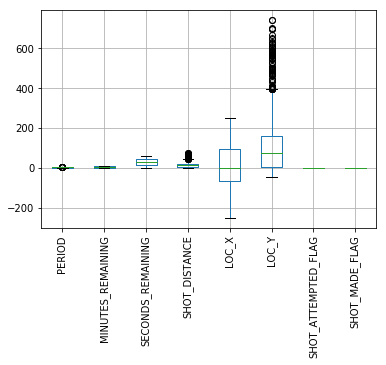

In [527]:
#LOC_X, LOC_Y in 0.1 feet
bp=df.boxplot(column=intcol[3:-1], return_type="both")
plt.xticks(rotation=90)

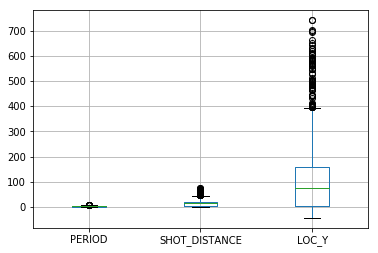

In [528]:
whiskers=[bp.lines["whiskers"][i:i+2] for i in range(0,len(bp.lines["whiskers"]),2)]
outliers=[]
for idx, i in enumerate(intcol[3:-1]):
    if min(df[i])<whiskers[idx][0].get_ydata()[1] or max(df[i])>whiskers[idx][1].get_ydata()[1]: outliers.append(i)
outliers_bp=df.boxplot(column=outliers, return_type="both")

In [529]:
print(df.PERIOD.value_counts())
print(df[['SHOT_DISTANCE','LOC_Y']].describe())
#outliers within reasonable range - explained by overtime and half court shots

3    7113
1    6915
4    6132
2    5710
5     283
6      38
7       7
Name: PERIOD, dtype: int64
       SHOT_DISTANCE         LOC_Y
count   26198.000000  26198.000000
mean       13.471105     91.065959
std         9.366627     87.550054
min         0.000000    -44.000000
25%         5.000000      4.000000
50%        15.000000     74.000000
75%        21.000000    160.000000
max        74.000000    741.000000


In [530]:
df[df.SHOT_DISTANCE>=outliers_bp.lines["whiskers"][3].get_ydata()[1]][['SHOT_DISTANCE','MINUTES_REMAINING','SECONDS_REMAINING']]

,SHOT_DISTANCE,MINUTES_REMAINING,SECONDS_REMAINING
812,58,0,1
888,53,0,0
94,58,0,0
424,59,0,0
1147,48,0,0
177,47,0,0
322,48,0,0
397,45,0,0
585,62,0,0
1073,70,0,0


In [531]:
df[df.LOC_Y>=outliers_bp.lines["whiskers"][5].get_ydata()[1]][['SHOT_DISTANCE','MINUTES_REMAINING','SECONDS_REMAINING']]

,SHOT_DISTANCE,MINUTES_REMAINING,SECONDS_REMAINING
603,42,0,0
812,58,0,1
888,53,0,0
893,43,0,0
905,44,0,0
94,58,0,0
424,59,0,0
427,40,0,0
1147,48,0,0
177,47,0,0


In [27]:
df['SECONDS_REMAINING']=df.SECONDS_REMAINING+df.MINUTES_REMAINING*60
df=df.drop(['GAME_EVENT_ID','PLAYER_ID','TEAM_ID','MINUTES_REMAINING','SHOT_ATTEMPTED_FLAG'],axis=1)

In [533]:
df

,PERIOD,SECONDS_REMAINING,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_AREA,LOC_X,LOC_Y,SHOT_MADE_FLAG,GAME_DATE,HTM,SEASON,OPP,SLAM,BANK,FOLLOW,CUTTING,FADEAWAY,DRIVING,TURNAROUND,PULLUP,FINGERROLL,STEPBACK,ALLEYOOP,UP,PUTBACK,RUNNING,REVERSE,FLOATING
0,1,42,Jump Shot,2PT Field Goal,Left Side Center(LC),-140,116,0,1996-11-03,LAL,1997,MIN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,608,Jump Shot,2PT Field Goal,Left Side Center(LC),-131,97,0,1996-11-05,NYK,1997,NYK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,517,Jump Shot,3PT Field Goal,Left Side Center(LC),-142,181,1,1996-11-06,CHH,1997,CHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,394,Jump Shot,3PT Field Goal,Center(C),0,0,0,1996-11-06,CHH,1997,CHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,327,Jump Shot,2PT Field Goal,Center(C),-10,138,1,1996-11-06,CHH,1997,CHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,438,Jump Shot,2PT Field Goal,Right Side Center(RC),75,177,0,1996-11-08,TOR,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2,136,Jump Shot,3PT Field Goal,Center(C),-64,223,1,1996-11-08,TOR,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,205,Layup Shot,2PT Field Goal,Center(C),0,0,1,1996-11-08,TOR,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,3,113,Jump Shot,2PT Field Goal,Left Side Center(LC),-79,177,0,1996-11-08,TOR,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,74,Jump Shot,3PT Field Goal,Left Side Center(LC),-103,207,1,1996-11-08,TOR,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Exploration

In [534]:
df.groupby('SHOT_MADE_FLAG').mean()

,PERIOD,SECONDS_REMAINING,LOC_X,LOC_Y,SEASON,SLAM,BANK,FOLLOW,CUTTING,FADEAWAY,DRIVING,TURNAROUND,PULLUP,FINGERROLL,STEPBACK,ALLEYOOP,UP,PUTBACK,RUNNING,REVERSE,FLOATING
SHOT_MADE_FLAG,,,,,,,,,,,,,,,,,,,,,
0,2.548443,315.335129,7.895725,102.999931,2006.672191,0.000552,0.007044,0.000069,0.000138,0.037912,0.033906,0.038671,0.009115,0.002900,0.002831,0.001865,0.009184,0.000345,0.015745,0.010427,0.002279
1,2.474183,326.268925,7.445080,76.316805,2006.449347,0.034992,0.028250,0.001195,0.000427,0.065887,0.147990,0.070325,0.026628,0.012119,0.005718,0.013143,0.027823,0.001109,0.058889,0.031237,0.005633


In [535]:
def group_cat(cat):
    c=pd.DataFrame(df.groupby([cat,'SHOT_MADE_FLAG']).count().iloc[:,1].rename('COUNT'))
    return(pd.concat([df.groupby([cat,'SHOT_MADE_FLAG']).mean(), c], axis=1))

In [538]:
group_cat('BANK')

PERIOD  SECONDS_REMAINING      LOC_X       LOC_Y  \
BANK SHOT_MADE_FLAG                                                       
0    0               2.551221         315.231031   8.284443  103.344043   
     1               2.474706         326.033199   8.671439   77.016512   
1    0               2.156863         330.009804 -46.901961   54.490196   
     1               2.456193         334.377644 -34.740181   52.247734   

                          SEASON      SLAM   FOLLOW   CUTTING  FADEAWAY  \
BANK SHOT_MADE_FLAG                                                       
0    0               2006.647959  0.000556  0.00007  0.000139  0.037833   
     1               2006.376778  0.036009  0.00123  0.000439  0.065958   
1    0               2010.088235  0.000000  0.00000  0.000000  0.049020   
     1               2008.945619  0.000000  0.00000  0.000000  0.063444   

                      DRIVING  TURNAROUND    PULLUP  FINGERROLL  STEPBACK  \
BANK SHOT_MADE_FLAG                                                         
0    0               0.034008    0.037833  0.008832    0.002921  0.002851   
     1               0.151941    0.067803  0.026875    0.012471  0.005884   
1    0               0.019608    0.156863  0.049020    0.000000  0.000000   
     1               0.012085    0.157100  0.018127    0.000000  0.000000   

                     ALLEYOOP        UP   PUTBACK   RUNNING   REVERSE  \
BANK SHOT_MADE_FLAG                                                     
0    0               0.001878  0.008902  0.000348  0.015161  0.010501   
     1               0.013525  0.028105  0.001142  0.058581  0.032145   
1    0               0.000000  0.049020  0.000000  0.098039  0.000000   
     1               0.000000  0.018127  0.000000  0.069486  0.000000   

                     FLOATING  COUNT  
BANK SHOT_MADE_FLAG                   
0    0               0.002295  14379  
     1               0.005709  11386  
1    0               0.000000    102  
     1               0.003021    331

In [540]:
group_cat('ACTION_TYPE')

PERIOD  SECONDS_REMAINING      LOC_X  \
ACTION_TYPE SHOT_MADE_FLAG                                           
Dunk Shot   0               2.649351         344.727273  -1.285714   
            1               2.468391         316.360153   0.471264   
Hook Shot   0               2.310811         347.864865  10.891892   
            1               2.400000         317.715789   9.842105   
Jump Shot   0               2.553929         315.245073   9.234116   
            1               2.484641         329.743844  10.697639   
Layup Shot  0               2.519221         312.104343   0.333000   
            1               2.447637         321.305482   0.582231   
Tip Shot    0               2.561224         344.948980   0.408163   
            1               2.490909         270.090909  -0.163636   

                                 LOC_Y       SEASON      SLAM      BANK  \
ACTION_TYPE SHOT_MADE_FLAG                                                
Dunk Shot   0                 1.350649  2003.766234  0.103896  0.000000   
            1                 1.313218  2004.558429  0.392720  0.000000   
Hook Shot   0                40.324324  2007.689189  0.000000  0.000000   
            1                40.368421  2008.389474  0.000000  0.052632   
Jump Shot   0               121.143021  2006.866792  0.000000  0.008341   
            1               111.873953  2006.820005  0.000000  0.041381   
Layup Shot  0                 3.425861  2005.720419  0.000000  0.000000   
            1                 2.861248  2006.066919  0.000000  0.000000   
Tip Shot    0                 1.367347  2003.357143  0.000000  0.000000   
            1                 1.581818  2004.290909  0.000000  0.000000   

                              FOLLOW   CUTTING  FADEAWAY   DRIVING  \
ACTION_TYPE SHOT_MADE_FLAG                                           
Dunk Shot   0               0.012987  0.000000  0.000000  0.103896   
            1               0.013410  0.000000  0.000000  0.288314   
Hook Shot   0               0.000000  0.000000  0.000000  0.081081   
            1               0.000000  0.000000  0.000000  0.073684   
Jump Shot   0               0.000000  0.000000  0.044893  0.001472   
            1               0.000000  0.000000  0.097994  0.001777   
Layup Shot  0               0.000000  0.000999  0.000000  0.229156   
            1               0.000000  0.001890  0.000000  0.533837   
Tip Shot    0               0.000000  0.000000  0.000000  0.000000   
            1               0.000000  0.000000  0.000000  0.000000   

                            TURNAROUND    PULLUP  FINGERROLL  STEPBACK  \
ACTION_TYPE SHOT_MADE_FLAG                                               
Dunk Shot   0                 0.000000  0.000000    0.000000  0.000000   
            1                 0.000000  0.000000    0.000000  0.000000   
Hook Shot   0                 0.067568  0.000000    0.000000  0.000000   
            1                 0.094737  0.000000    0.000000  0.000000   
Jump Shot   0                 0.045384  0.010794    0.000000  0.003353   
            1                 0.103199  0.039604    0.000000  0.008505   
Layup Shot  0                 0.000000  0.000000    0.020969  0.000000   
            1                 0.000756  0.000000    0.053686  0.000000   
Tip Shot    0                 0.000000  0.000000    0.000000  0.000000   
            1                 0.000000  0.000000    0.000000  0.000000   

                            ALLEYOOP        UP   PUTBACK   RUNNING   REVERSE  \
ACTION_TYPE SHOT_MADE_FLAG                                                     
Dunk Shot   0               0.064935  0.012987  0.012987  0.038961  0.051948   
            1               0.096743  0.013410  0.004789  0.015326  0.073755   
Hook Shot   0               0.000000  0.000000  0.000000  0.121622  0.000000   
            1               0.000000  0.000000  0.000000  0.284211  0.000000   
Jump Shot   0               0.000000  0.010794  0.000000  0.015292  0.000000  

##### Visualisation

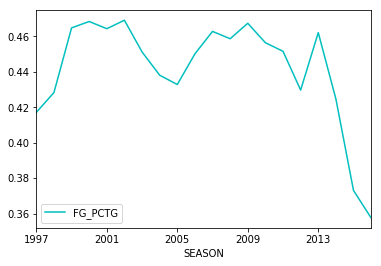

In [541]:
tmp=df[['SEASON','SHOT_MADE_FLAG']].groupby('SEASON').agg(['sum','count'])
tmp.columns=tmp.columns.droplevel()
tmp.columns=['FGM','FGA']
tmp=tmp.reset_index()
tmp['FG_PCTG']=tmp.FGM.divide(tmp.FGA)
ax=tmp.plot(x='SEASON',y='FG_PCTG',color='c')
_=ax.set_xticks(range(1997,2017,4))

In [570]:
def plot_pctg(col):
    tmp=df[[col,'SHOT_MADE_FLAG']].groupby(col).agg(['sum','count'])
    tmp.columns=tmp.columns.droplevel()
    tmp.columns=['FGM','FGA']
    
    tmp['FG_PCTG']=tmp.FGM.divide(tmp.FGA)
    tmp=tmp.sort_values('FG_PCTG',ascending=False)
    tmp=tmp.reset_index()
    ax=tmp.plot(x=col,y='FG_PCTG',color='#552583',kind='bar',figsize=(9,6))
    if col=='HTM': ax.get_children()[tmp.index[tmp['HTM']=='LAL'][0]].set_color('#FDB927')
    return(ax)

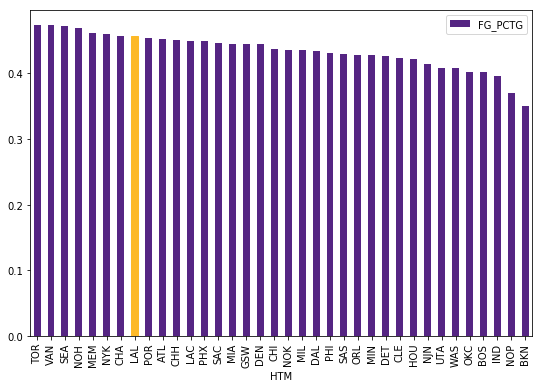

In [573]:
htm_plot=plot_pctg('HTM')

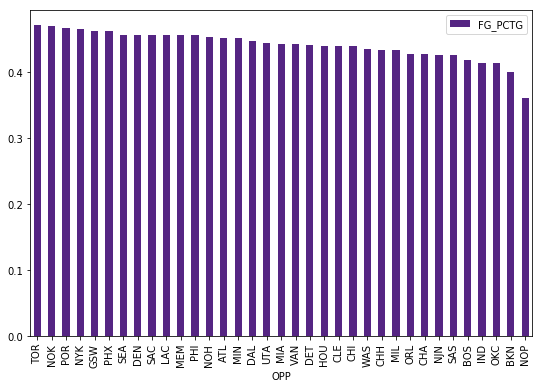

In [574]:
opp_plot=plot_pctg('OPP')

In [ ]:
def plot_shotchart(sc,hb=False):
    fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(8, 12))
    #plt.figure(figsize=(9,12))
    plt.xlim(-250,250)
    plt.ylim(-47.5,702.5)
    
    c = 'white' if hb else 'black'
    
    patches = [Rectangle((-250, -47.5), 500, 0, linewidth=2, color=c),
    Rectangle((-250, -47.5), 0, 940, linewidth=2, color=c),
    Rectangle((250, -47.5), 0, 940, linewidth=2, color=c),
    Rectangle((-250, 422.5), 500, 0, linewidth=2, color=c),
    Rectangle((-220, -47.5), 0, 140, linewidth=2, color=c),
    Rectangle((220, -47.5), 0, 140, linewidth=2, color=c),
    Rectangle((-30, -7.5), 60, 0, linewidth=4, color=c)
    Rectangle((-60, 142.5), 120, 0, linewidth=2, color=c),
    Rectangle((-60, -47.5), 120, 190, linewidth=2, color=c, fill=False),
    Rectangle((-80, -47.5), 160, 190, linewidth=2, color=c, fill=False),
    Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=2, color=c),
    Circle((0, 0), 7.5, linewidth=2, color=c, fill=False),
    Circle((0, 142.5), 60, linewidth=2, color=c, fill=False),]

    add_patches(patches)
    colors=["#f75036", "#37f275"]
    labs=["FG Missed", "FG Made"]
    
    if(not hb):
        for i in [0,1]:
            fg=sc[sc.SHOT_MADE_FLAG==i][["LOC_X","LOC_Y"]]
            plt.scatter(-fg.LOC_X, fg.LOC_Y, s=2, c=colors[i], label=labs[i])
        plt.legend()
    else:
        hb = ax.hexbin(sc.LOC_X, sc.LOC_Y, cmap="inferno", gridsize=72, norm=matplotlib.colors.LogNorm())
        cb = fig.colorbar(hb, ax=ax)

    plt.show()

In [156]:
from matplotlib.patches import Circle, Rectangle, Arc

def add_patches(p):
    ax=plt.gca()
    for i in p:
        ax.add_patch(i)
        
def plot_shotchart(sc,hb=False):
    fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(8, 12))
    #plt.figure(figsize=(9,12))
    plt.xlim(-250,250)
    plt.ylim(-47.5,702.5)
    
    c = 'white' if hb else 'black'
    
    rect_dims=[[-250,-47.5,500,0,2],[-250,-47.5,0,940,2],[250,-47.5,0,940,2],[-250,422.5,500,0,2],[-220,-47.5,0,140,2],[220,-47.5,0,140,2],[30,-7.5,60,0,4],[-60,142.5,120,0,2],[-60,47.5,120,190,2],[-80,47.5,160,190,2]] 
    patches=[Rectangle((i[0],i[1]),i[2],i[3],linewidth=i[4]) for i in rect_dims]
    patches.append(Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=2, color=c))
    patches.append(Circle((0, 0), 7.5, linewidth=2, color=c, fill=False))
    patches.append(Circle((0, 142.5), 60, linewidth=2, color=c, fill=False))

    add_patches(patches)
    colors=["#f75036", "#37f275"]
    labs=["FG Missed", "FG Made"]
    
    if(not hb):
        for i in [0,1]:
            fg=sc[sc.SHOT_MADE_FLAG==i][["LOC_X","LOC_Y"]]
            plt.scatter(-fg.LOC_X, fg.LOC_Y, s=2, c=colors[i], label=labs[i])
        plt.legend()
    else:
        hb = ax.hexbin(sc.LOC_X, sc.LOC_Y, cmap="inferno", gridsize=72, norm=matplotlib.colors.LogNorm())
        cb = fig.colorbar(hb, ax=ax)
        
    plt.show()

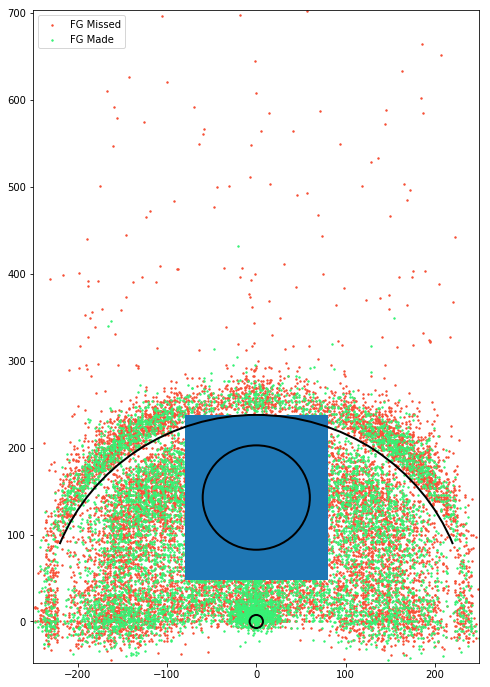

In [157]:
plot_shotchart(df,False)

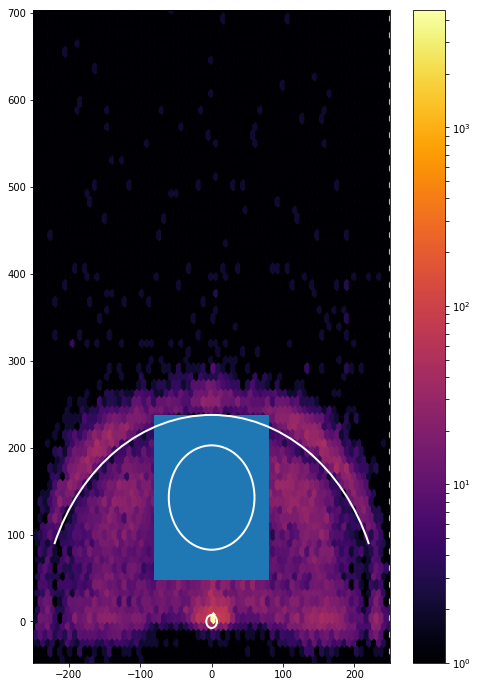

In [152]:
plot_shotchart(df,True)

### Modeling

In [14]:
import statsmodels.api as sm

C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [60]:
dfm=df.copy()
dfm['GAME_DATE']=pd.to_numeric(dfm['GAME_DATE'])

In [61]:
def split_categorical(d, cat):
    d=pd.concat([d,pd.get_dummies(d[cat])],axis=1)
    return(d.drop(cat,axis=1))
dfm=split_categorical(dfm,['ACTION_TYPE','SHOT_TYPE','SHOT_ZONE_AREA','HTM','OPP'])

In [62]:
dfm.shape

(26198, 108)

In [196]:
import sklearn
from sklearn import model_selection
ttsplit=sklearn.model_selection.train_test_split(dfm,train_size=0.9,test_size=0.1)
train_data=ttsplit[0]
test_data=ttsplit[1]
print (train_data.shape, test_data.shape)

(23578, 108) (2620, 108)


In [64]:
dfm=dfm.reset_index().drop('index', axis=1)
test_data=dfm.sample(frac=0.1)
train_data=dfm.drop(test_data.index)
print(train_data.shape, test_data.shape)

(23578, 108) (2620, 108)


In [195]:
dfm['LOC_X']=abs(dfm.LOC_X)

In [197]:
y_train = train_data.SHOT_MADE_FLAG
X_train = train_data.drop('SHOT_MADE_FLAG',axis=1)

logit = sm.Logit(y_train, X_train)
log_res = logit.fit()

print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.610165
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         SHOT_MADE_FLAG   No. Observations:                23578
Model:                          Logit   Df Residuals:                    23577
Method:                           MLE   Df Model:                            0
Date:                Sun, 14 Jan 2018   Pseudo R-squ.:                  0.1130
Time:                        08:16:14   Log-Likelihood:                -14386.
converged:                       True   LL-Null:                       -16219.
                                        LLR p-value:                       nan
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
PERIOD                                  -0.0617      0.

C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [198]:
print(np.exp(log_res.params))

PERIOD                       0.940122
SECONDS_REMAINING            1.000233
SHOT_DISTANCE                1.027285
LOC_X                        0.999586
LOC_Y                        0.999257
GAME_DATE                    1.000000
SEASON                       1.006753
DRIVING                      4.520205
UP                           2.484328
STEPBACK                     3.949437
REVERSE                      2.426687
TURNAROUND                   2.489648
RUNNING                      5.777354
FADEAWAY                     2.524010
FINGERROLL                   2.273298
FLOATING                     5.002106
PULLUP                       2.227350
FOLLOW                       1.115374
BANK                         5.732267
CUTTING                      3.252362
PUTBACK                      3.440605
SLAM                        11.987222
ALLEYOOP                     4.082110
ACTION_TYPE_Dunk Shot        0.270708
ACTION_TYPE_Hook Shot        0.042554
ACTION_TYPE_Jump Shot        0.025601
ACTION_TYPE_

### Prediction

In [199]:
X_test = test_data.drop('SHOT_MADE_FLAG',axis=1)
y_pred = log_res.predict(X_test)

In [200]:
pred_ct=pd.DataFrame(test_data['SHOT_MADE_FLAG']).join(y_pred.rename('pred')).reset_index().drop('index',axis=1)

In [201]:
pred_ct['pred']=np.where(pred_ct.pred>threshold[np.argmax(tpr - fpr)],1,0)

In [202]:
pred_ct

,SHOT_MADE_FLAG,pred
0,1,1
1,0,1
2,1,1
3,1,0
4,0,0
5,1,1
6,0,0
7,1,0
8,0,0
9,0,0


In [203]:
ct=pd.crosstab(index=pred_ct['SHOT_MADE_FLAG'],columns=pred_ct['pred'])
ct

pred,0,1
SHOT_MADE_FLAG,,
0,1243,241
1,588,548


In [204]:
(ct.loc[0,0]+ct.loc[1,1])/ct.sum().sum()

0.68358778625954197

In [165]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_true=test_data['SHOT_MADE_FLAG'],y_score=y_pred)
roc_auc=sklearn.metrics.auc(fpr,tpr)

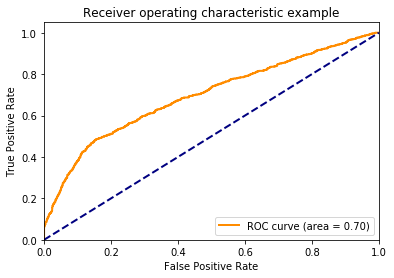

In [167]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [185]:
threshold

array([ 0.99481125,  0.93765033,  0.93360942, ...,  0.22912245,
        0.22396508,  0.0113318 ])

In [176]:
np.divide(tpr,fpr)

C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([         inf,          inf,  89.24481328, ...,   1.00891864,
         1.01143674,   1.        ])

In [186]:
threshold[np.argmax(tpr - fpr)]

0.44610465659052262

### Evaluation